## Implement a simple Multi-layer perceptron from scratch in Python to solve a basic binary classification problem (e.g., XOR gate)

In [162]:
import numpy as np
import matplotlib.pyplot as plt

In [163]:
class Layer:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.biases = np.zeros((output_size, 1))
        self.input = None
        self.z = None
        self.output = None

    def forward(self, input_data):
        self.input = input_data
        self.z = np.dot(self.weights, input_data) + self.biases
        self.output = self.sigmoid(self.z)
        return self.output

    def backward(self, d_output, learning_rate):
        d_z = d_output * self.sigmoid_derivative(self.z)
        d_weights = np.dot(d_z, self.input.T)
        d_biases = d_z
        d_input = np.dot(self.weights.T, d_z)

        self.weights -= learning_rate * d_weights
        self.biases -= learning_rate * np.mean(d_biases, axis=1, keepdims=True)

        return d_input
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        sx = self.sigmoid(x)
        return sx * (1 - sx)

class Perceptron:
    def __init__(self):
        self.layers = []

    def add_layer(self, input_size, output_size):
        self.layers.append(Layer(input_size, output_size))

    def forward(self, input_data):
        activation = input_data
        for layer in self.layers:
            activation = layer.forward(activation)
        return activation

    def train(self, x, y, learning_rate=0.1, epochs=1000):
        for _ in range(epochs):
            output = self.forward(x)
            error = output - y
            d_output = 2 * error

            for layer in reversed(self.layers):
                d_output = layer.backward(d_output, learning_rate)

In [ ]:
# XOR problem
p = Perceptron()

# Uses multi-layered perceptron
p.add_layer(input_size=2, output_size=4) # Hidden layer
p.add_layer(input_size=4, output_size=1) # Ouput layer

x = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]])  

y = np.array([[0, 1, 1, 0]]) 

p.train(x, y, learning_rate=0.5, epochs=10000)

In [165]:
test = [(0, 0), (0, 1), (1, 0), (1, 1)]

for x1, x2 in test:
    output = (p.forward(np.array([[x1], [x2]]))[0][0])
    print(f"{x1} XOR {x2}: {round(output)}")

0 XOR 0: 0
0 XOR 1: 1
1 XOR 0: 1
1 XOR 1: 0


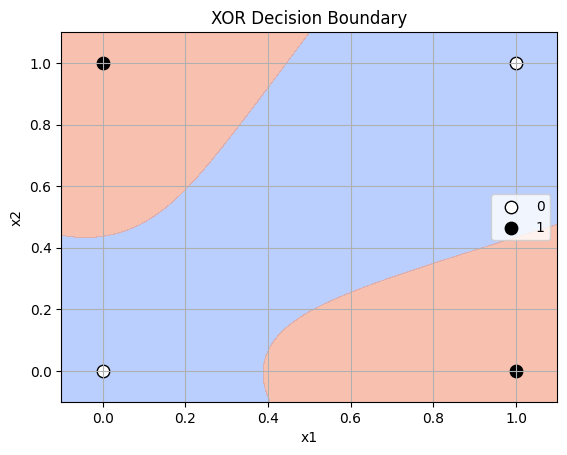

In [166]:
h = 0.01  
x_min, x_max = -0.1, 1.1
y_min, y_max = -0.1, 1.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()].T 

Z = p.forward(grid_points) 
Z = Z.reshape(xx.shape)     

plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.6, cmap='coolwarm')

train_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
train_labels = np.array([0, 1, 1, 0])

class0 = train_inputs[train_labels == 0]
class1 = train_inputs[train_labels == 1]

plt.scatter(class0[:, 0], class0[:, 1], c='white', edgecolors='k', s=80, label='0')
plt.scatter(class1[:, 0], class1[:, 1], c='black', edgecolors='k', s=80, label='1')

plt.title("XOR Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()